<h1>View Main Dataset</h1>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

style.use('dark_background')

titanic_data = pd.read_csv("train.csv")
titanic_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

<h2> Preprocessing Data </h2>

In [24]:

titanic_data = titanic_data.replace(("male", "female"), (0,1))
titanic_data['Fare'] = (titanic_data['Fare']-titanic_data['Fare'].mean())/titanic_data['Fare'].mean()
col = titanic_data.columns.to_list()

titanic_data['Age'] = titanic_data['Age'].fillna(value = titanic_data['Age'].median())
#for name in col:
#   print(name, titanic_data[name].isnull().sum())

<h2> Histogram plotting based on features </h2>

<AxesSubplot:title={'center':'Onboard'}, ylabel='Frequency'>

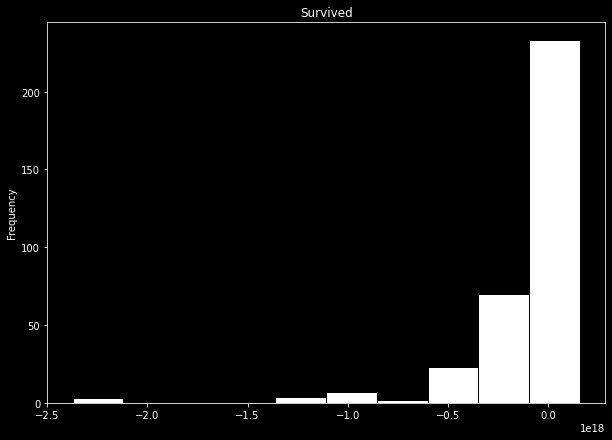

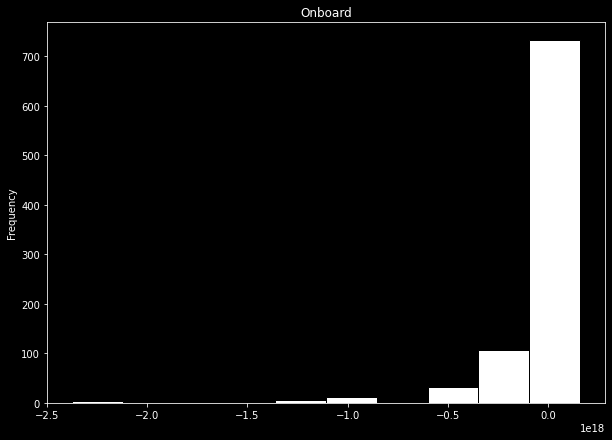

In [25]:
x = titanic_data.loc[titanic_data['Survived'] == 1]
plot1 = plt.figure(1)
plt.title("Survived")
x.Fare.plot(kind = "hist", color = 'white', edgecolor='black', figsize=(10, 7))
plot2 = plt.figure(2)
plt.title("Onboard")
titanic_data.Fare.plot(kind = "hist", color = 'white', edgecolor='black', figsize=(10, 7))


In [26]:
x = titanic_data.loc[titanic_data['Survived'] == 1]
nan_count = len(x.index)
nan_count

342

<h2> Splitting Training Data </h2>

In [27]:
f = titanic_data.columns.tolist()
f.pop(1)
f.pop(2)
f.pop(6)
f.pop(7)
f.pop(7)
print(f)
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
#X = titanic_data[titanic_data.columns.tolist()]
Y = titanic_data.Survived



from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 0)

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


<h2> Using RFE to determine feature importance </h2>

In [28]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X,Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False  True False False  True]
Feature Ranking: [1 3 1 2 4 1]


C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<h2> Using Feature Importance to determine feature importance </h2>

In [29]:
from sklearn.ensemble import ExtraTreesClassifier


model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.11421087 0.28258086 0.24352352 0.04294268 0.04210824 0.27463383]


<h2> Hyperparameter Tuning </h2>

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#model = RandomForestClassifier(n_estimators = 10, max_depth=None, random_state=0, oob_score = True)

mlpc = MLPClassifier()
param_grid = {
    'solver' : ['adam', 'lbfgs'],
    'hidden_layer_sizes' : [(6, 16), (5,14), (7, 20)],
    'activation' : ['tanh', 'relu', 'identity', 'logistic']
}
clf = GridSearchCV(mlpc, param_grid, n_jobs=1, cv = 5)
clf.fit(train_X, train_Y)
#model = LogisticRegression()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


print('Best parameters found:\n', clf.best_params_)

C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning

C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning

0.653 (+/-0.041) for {'activation': 'tanh', 'hidden_layer_sizes': (6, 16), 'solver': 'adam'}
0.653 (+/-0.041) for {'activation': 'tanh', 'hidden_layer_sizes': (6, 16), 'solver': 'lbfgs'}
0.653 (+/-0.041) for {'activation': 'tanh', 'hidden_layer_sizes': (5, 14), 'solver': 'adam'}
0.653 (+/-0.041) for {'activation': 'tanh', 'hidden_layer_sizes': (5, 14), 'solver': 'lbfgs'}
0.653 (+/-0.041) for {'activation': 'tanh', 'hidden_layer_sizes': (7, 20), 'solver': 'adam'}
0.653 (+/-0.041) for {'activation': 'tanh', 'hidden_layer_sizes': (7, 20), 'solver': 'lbfgs'}
0.548 (+/-0.268) for {'activation': 'relu', 'hidden_layer_sizes': (6, 16), 'solver': 'adam'}
0.581 (+/-0.198) for {'activation': 'relu', 'hidden_layer_sizes': (6, 16), 'solver': 'lbfgs'}
0.443 (+/-0.229) for {'activation': 'relu', 'hidden_layer_sizes': (5, 14), 'solver': 'adam'}
0.522 (+/-0.223) for {'activation': 'relu', 'hidden_layer_sizes': (5, 14), 'solver': 'lbfgs'}
0.644 (+/-0.048) for {'activation': 'relu', 'hidden_layer_sizes':

<h2> Model Training </h2>

In [22]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 16), random_state=1)
model.fit(train_X, train_Y)

C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 16), random_state=1,
              solver='lbfgs')

<h2> Prediction and Model Validation </h2>

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

predictions = model.predict(test_X)
print(accuracy_score(test_Y, predictions))

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

0.9865470852017937
Accuracy: 0.789 (0.040)


<h2> Results </h2>

In [45]:
test_data = pd.read_csv("test.csv")
test_data = test_data.replace(("male", "female"), (0,1))
test_data ['Age'].isnull().values.sum()

test_data['Fare'] = test_data ['Fare'].fillna(value = test_data ['Fare'].median())
test_data['Age'] = test_data ['Age'].fillna(value = test_data ['Age'].median())

passengerid = test_data['PassengerId']
test_data = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

predictions = model.predict(test_data)
results = pd.DataFrame({'PassengerId': passengerid, 'Survived': predictions})
results.to_csv("predictions.csv", index=False)
